In [70]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from top2vec import Top2Vec
from scipy.stats import zscore

from helpers import parl_helpers
from helpers.infodynamics import InfoDynamics
from helpers.metrics import jsd, kld, cosine_distance
from helpers.afa import adaptive_filter
from helpers.util import softmax

cfg = pd.read_json('config.json',orient='index').to_dict()[0]

sns.set_style('white')
plt.rcParams["font.family"] = "Nimbus Roman"

In [71]:
df = pd.read_json(os.path.join(cfg['novelty_output_path'], f'novelty_w30.ndjson'))
mtd = pd.read_csv(cfg['metadata_path'],sep='\t',usecols=['date','speech_id','member-ref','role'])
df['date'] = pd.to_datetime(mtd.date).dt.strftime('%Y-%m-%d')
df['month'] = pd.to_datetime(mtd.date).dt.strftime('%Y-%m')
df['year'] = pd.to_datetime(mtd.date).dt.strftime('%Y')
df['mbs'] = mtd['member-ref'].apply(lambda x: parl_helpers.mbs.get(x))
df = df.groupby("mbs").filter(lambda x: len(x) > 50)

In [63]:
vcs = {parl_helpers.mbs.get(k):v for k,v in mtd['member-ref'].value_counts().to_dict().items()}

In [64]:
rd = dict(zip([parl_helpers.mbs.get(i) for i in mtd['member-ref']],mtd['role']))

In [65]:
dfs = df.groupby('mbs').mean()
dfs['role'] = [rd[i] for i in dfs.index]

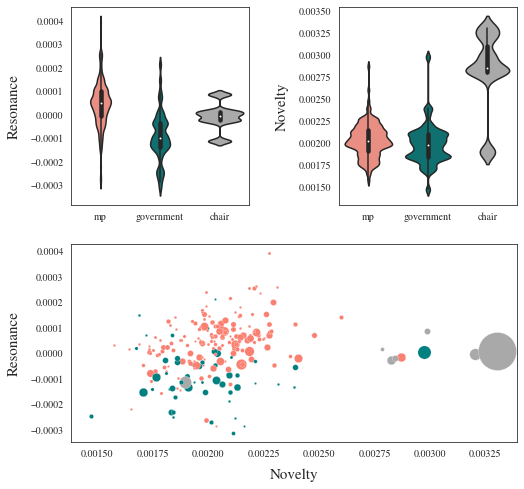

In [106]:
# fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 2]},sharey=False)
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]

fig.tight_layout()

cols = {"government":"teal","mp":"salmon","chair":"darkgrey"}

for i,r in dfs.iterrows():
    ax3.scatter(r['novelty'],r['resonance'],s=vcs[i] / 10,c=cols[rd[i]],lw=.25,edgecolor='white')
    
ax3.set_xlabel('Novelty',labelpad=10,fontsize=15)
ax3.set_ylabel('Resonance',labelpad=10,fontsize=15)

my_pal = {"mp": "salmon", "government": "teal", "chair": "darkgray"}
sns.violinplot(data=dfs,y='novelty',x='role',palette=my_pal,bw=.15,ax=ax2)
ax2.set_ylabel('Novelty',labelpad=10,fontsize=15)
ax2.set_xlabel('',labelpad=10,fontsize=15)

my_pal = {"mp": "salmon", "government": "teal", "chair": "darkgray"}
sns.violinplot(data=dfs,y='resonance',x='role',palette=my_pal,bw=.15,ax=ax1)
ax1.set_ylabel('Resonance',labelpad=10,fontsize=15)
ax1.set_xlabel('',labelpad=10,fontsize=15)


plt.subplots_adjust(wspace=.5)
plt.savefig('actor-level-nov-res-role-colored.pdf',bbox_inches='tight',dpi=250)
plt.show()